<a href="https://colab.research.google.com/github/funnyComment/Entregas/blob/main/AO/EnriqueDiaz_Trabajo_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Enrique Díaz de la Iglesia  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---/tree/master/TrabajoPractico<br>
Google Colab: https://colab.research.google.com/drive/1yQ4Pxf0WQb4UUTJKHVJDxgu5LFTuQku0?usp=sharing <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Configuración de Tribunales



## Descripción del problema: Organizar los horarios de partidos de La Liga

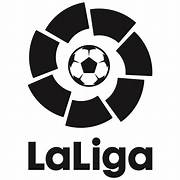

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.<br>
Los horarios disponibles se conocen a priori y son los siguientes:

\begin{array}{|c|c|} \hline
Viernes & Sábado & Domingo & Lunes \\ \hline
-       & 12     & 12      & -     \\ \hline
-       & 16     & 16      & -     \\ \hline
-       & 18     & 18      & -     \\ \hline
20      & 20     & 20      & 20    \\ \hline
\end{array}

<br>
En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.<br>
Se conoce estadísticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

\begin{array}{|c|c|} \hline
Categorias & A   & B   & C             \\ \hline
A          & 2 millones & 1.3 millones & 1 millón     \\ \hline
B          & -          & 0.9 millones & 0.75 millones \\ \hline
C          & -          & -            & 0.47 millones \\ \hline
\end{array}

<br>
Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce
según los coeficientes de la siguiente tabla. <br>

\begin{array}{|c|c|} \hline
horas & Viernes & Sábado & Domingo & Lunes \\ \hline
12      & -       & 0.55     & 0.45      & -     \\ \hline
16      & -       & 0.7     & 0.75      & -     \\ \hline
18      & -       & 0.8     & 0.85      & -     \\ \hline
20      & 0.4      & 1     & 1     & 0.4    \\ \hline
\end{array}
Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.<br>

Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:

\begin{array}{|c|c|} \hline
Coincidencias & porcentaje  \\ \hline
0             & 0  \\ \hline
1             & 25 \\ \hline
2             & 45 \\ \hline
3             & 60 \\ \hline
4             & 70 \\ \hline
5             & 75 \\ \hline
6             & 78 \\ \hline
7             & 80 \\ \hline
8             & 80 \\ \hline
\end{array}
<br>
Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la
siguiente tabla:

\begin{array}{|c|c|} \hline
Partido & Categorias & Horario & Base(mill.) & Ponderación & Base*Ponderacion & corrección_coincidencias \\ \hline
Celta-R. Madrid      & B-A & V20 & 1.3  & 0.4  & 0.52 & 0.52 \\ \hline
Valencia-R. Sociedad & B-A & S12 & 1.3  & 0.55 & 0.72 & 0.72 \\ \hline
Mallorca-Eibar       & C-C & S16 & 0.47 & 0.7  & 0.33 & 0.33 \\ \hline
Athletic-Barcelona   & B-A & S18 & 1.3  & 0.8  & 1.04 & 1.04 \\ \hline
Leganés-Osasuna      & C-C & S20 & 0.47 & 1    & 0.47 & 0.47 \\ \hline
Villarreal-Granada   & B-C & D16 & 0.75 & 0.75 & 0.56 & 0.42 \\ \hline
Alavés-Levante       & B-B & D16 & 0.9  & 0.75 & 0.68 & 0.51 \\ \hline
Espanyol-Sevilla     & B-B & D18 & 0.9  & 0.85 & 0.77 & 0.77 \\ \hline
Betis-Valladolid     & B-C & D20 & 0.75 & 1    & 0.75 & 0.75 \\ \hline
Atlético-Getafe      & B-B & L20 & 0.9  & 0.4  & 0.36 & 0.36 \\ \hline
\end{array}




#Modelo
## ¿Como represento el espacio de soluciones?

En el problema se trata de asignar a ***'n'*** partidos diferentes ***'m'*** fechas, teniendo en cuenta que estas fechas se pueden repetir. Se trata de un problema de variaciones con repetición (VR) de modo que el espacio de soluciones queda definido por la expresión:<br>
```
VR = m^n
```
Sin embargo, nos dicen que un número determinado de fechas ***'p'*** deben ocuparse obligatoriamente, por lo tanto, deben eliminarse todas las configuraciones del espacio de soluciones en las que no se asigna ningún partido a dichas fechas. Lo que equivale a eliminar el número de configuraciones en las que se puede asiganar a ***'n'*** partidos diferentes ***'m-p'*** fechas disponibles:<br>
```
Espacio de soluciones = m^n - (m-p)^n
```

## ¿Cual es la función objetivo?

El objetivo del problema es maximizar la audiencia obtenida a lo largo de la jornada. Los partidos ya estan asignados y en función de sus categorias se espera un nivel de audiencia base por cada uno de ellos. Los niveles de audiencia de cada partido varian en función ponderaciones relacionadas con la fecha de los partidos y coincidencia de dos o más partidos en una misma fecha.
Tras asignar una fecha a cada partido y realizar las poderaciones sobre sus audiencias base, la suma de las audiencias obtenidas será la función objetivo que se debe maximizar.<br>

```
Funcion objetivo = sum(audiencias_base*ponderacion_fechas*ponderacion_coincidencias)
```
## ¿Como implemento las restricciones?

Se han considerado 3 tipos de restricciones que caracterizan el problema.

*   Asignación obligatoria de fecha
*   Ponderación por fecha
*   Ponderación por coincidencia

La ***asignación obligatoria de fecha*** hace referencia a un aspecto que ya se ha discutido en el apartado "¿Como represento el espacio de soluciones?". Las fechas del Viernes a las 20:00 (V20) y Lunes a las 20:00 (L20) deben asignarse obligatoriamente. Para ello, la generación de una solución al problemas pasará por 2 etapas:<br>


1.   Una primera etapa en la que se asigna a 2 partidos cualesquiera las fechas V20 y L20.
2.   Una segunda etapa en la que se asigna a resto de partidos cualquiera de las fechas dispoibles, V20 y L20 incluidas.


La ***ponderación por fecha*** se refiere al porcentaje de la audiencia que tendrá un partido con respecto a su audiencia base en función de la fecha asignada. Esta restricción se implementará en la primera etapa de evaluación de la solución generada, multiplicando cada una de las audiencias base de los partidos asignados por su correspondiente coeficiente de ponderación por fecha.<br>
```
audiencias_ponderadas = audiencias_base*ponderacion_fechas
```
La ***ponderación por coincidencia*** se refiere al porcentaje de la audiencia que tendrá un partido en función del número de partidos que tengan lugar en esa misma fecha. Se implentará en la segunda etapa de evaluación de la solución generada, multiplicando cada una de las audiencias ponderadas por el correspondiente coeficiente de ponderación por coincidencia obtenido tras examinar todas las fechas asignadas por la solución.
```
audiencias_finales = audiencias_ponderadas*ponderacion_coincidencias
```



#Análisis
##¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones
### Orden de complejidad del problema
La complejidad de un problema es el mínimo de las complejidades de los algoritmos que pueden resolver el problema, incluidos los algoritmos desconocidos. Por tanto, la complejidad de un problema no es mayor que la complejidad de cualquier algoritmo que resuelva el problema.<br>
Al tratarse de un problema de optimización, la solución por fuerza bruta (el peor escenario posible), pasa por evaluar todas las soluciones y escoger aquella que maximiza la función objetivo.<br>
Para un número determinado de fechas por jornada ( a ), la complejida del problema aumenta con el número de partidos ( n ) que se desean asignar. Como se describe en el apartado de "Modelo" el espacio de soluciones esta definido por la variaciones con repetición de 'n' partidos en 'a' fechas.
```
VR = a^n
```
Por lo tanto, la comoplejidad del problema ***O(a^n)*** es de **orden exponencial**.<br>
Para el cálculo de la complejidad no se ha tenido en cuenta las restricciones debidas a la asignación obligatoria de fechas ya que no afectan al orden de complejidad. Sin embargo, para el cáculo del espacio de soluciones del problema deberá tenerse en cuenta el efecto de dicha restricción.<br>
### Cálculo del espacio de soluciones
Se cálcula el espacio de soluciones sustituyendo en las expresiones desarrolladas en el apartado de "Modelo" los valores definidos en el anunciado ,siendo 10 el número de partidos y 10 el número de fechas disponibles para su asignación:<br>
```
VR = 10^10
```
El enunciado nos dice que 2 de las 10 fechas disponibles ( Viernes a las 20:00 y Lunes a la 20:00 ) deben ocuparse obligatoriamente, por lo tanto, habrá que eliminar el número de configuraciones en las que se puede asiganar a 10 partidos diferentes 8 fechas disponibles:<br>
```
Espacio de soluciones = 10^10 - 8^10
```
>Espacio de soluciones =  ***8926258176*** soluciones posibles
<br>




#Diseño
##¿Que técnica utilizo? ¿Por qué?

Se ha optado por abordar el problema por medio de un algoritmo genético (GA). El comportamiento no lineal de la función objetivo debido a las restricciones y el tamaño del espacio de soluciones convierten al problema en un escenario ideal para poner en práctica esta técnica de optimización. Además, la naturaleza de las soluciones permiten una modelización clara del problema en términos biológicos, de manera que los genotipos del inidividuo se corresponden con las fechas asignadas para cada partido.<br>
También se han aplicado otras técnicas como busqueda aleatoria y recocido simulado para tener una compartiva entre soluciones obtenidas con diferentes métodos heurísticos.

## Implementación del algoritmo

### Importar librerias

In [ ]:
# Importar librerias
import pandas as pd
pd.options.mode.copy_on_write = False
import numpy as np
from copy import deepcopy
#import random
import math
import random as rd
from matplotlib import pyplot as plt
import seaborn as sns

### Definir funciones auxiliares

In [ ]:
# Definir funciones y estructura del programa

def base(categoria):
  '''
  Asocia la ponderación adecuada para cada categoria
  de partidos.
  '''
  c1,c2 = sorted(categoria.upper())
  categoria = c1+c2
  dic = {
      'AA': 2,
      'AB': 1.3,
      'AC': 1,
      'BB': 0.9,
      'BC': 0.75,
      'CC': 0.47
  }
  return dic.get(categoria)

def ponderacion_fecha(hora):
  '''
  Asocia la ponderación adecuada para cada fecha.
  '''
  dic = {
      'V20': 0.4,
      'S12': 0.55,
      'S16': 0.7,
      'S18': 0.8,
      'S20': 1,
      'D12': 0.45,
      'D16': 0.75,
      'D18': 0.85,
      'D20': 1,
      'L20': 0.4
  }
  return dic.get(hora)

def correccion_coincidencia(n):
  '''
  Asocia la correción adecuada en funcion del número
  de concidencias entre fechas de un partido.
  '''
  dic = {
      0: 0,
      1: 0.25,
      2: 0.45,
      3: 0.60,
      4: 0.70,
      5: 0.75,
      6: 0.78,
      7: 0.80,
      8: 0.80
  }
  return dic.get(n,0.80)

# Crear un dataframe para visualizar la solución
def crear_dataframe_solucion(partidos,fechas):
  '''
  Crea un datafrema para visualizar los datos de una solución
  determinada por medio de una tabla como la del enunciado del
  problema.
  '''
  jornada = partidos
  jornada['fechas'] = fechas
  jornada['ponderacion_fechas'] = jornada.apply(lambda row: ponderacion_fecha(row.fechas), axis=1)
  jornada['bases_ponderadas'] = jornada.apply(lambda row: row.base*row.ponderacion_fechas, axis=1)
  coincidencias = jornada['fechas'].value_counts()
  jornada['coincidencias'] = jornada.apply(lambda row: coincidencias.loc[row.fechas]-1,axis=1)
  jornada['correccion_coincidencias'] = jornada.apply(lambda row: row.bases_ponderadas*(1-correccion_coincidencia(row.coincidencias)),axis=1)
  audiencia_jornada = jornada['correccion_coincidencias'].sum()
  return jornada, audiencia_jornada


### Estructurar los datos del problema

Para el problema se ha asumido que la jornada viene dada por los partidos asignados en el ejemplo del enunciado con sus correspondientes categorias. Cada solución vendrá definida por una lista donde cada indice se corresponde con un determinado partido según vienen ordenados en el ejmplo y cuyos elementos se corresponden con una cadena de caracteres que representan la etiqueta de la fecha de cada partido.<br>
Para visualizar los resultados de manera clara se define un dataframe 'partidos ' con un identificador para cada partido, la etiqueta con la categoria y su correspondiente base de audiencia. De este modo, cuando se calcule una solución pondrán añadirse al dataframe columnas que incluyan las fechas asignadas a cada partido con sus correspondientes ponderaciones en función de la fecha y el número de coincidencias entre partidos.

In [ ]:
id_partidos = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
categorias = ['BA','BA','CC','BA','CC','BC','BB','BB','BC','BB',]
bases = [base(c) for c in categorias]
base_partidos = {'categorias':categorias,'base':bases}
partidos = pd.DataFrame(base_partidos,index=id_partidos)
partidos.index.name='id_partido'
display(partidos)

,categorias,base
id_partido,,
P1,BA,1.30
P2,BA,1.30
P3,CC,0.47
P4,BA,1.30
P5,CC,0.47
P6,BC,0.75
P7,BB,0.90
P8,BB,0.90
P9,BC,0.75


### Generar solución

Devuelve una lista con las fechas asignadas donde los indices de cada elemento representan el partido al que se le asignado dicha fecha. Tiene en cuenta las restricciones del problema (Debe haber al menos un partido en V20 y L20).

In [ ]:
########################
## Generar soluciones ##
########################
def generar_solucion():
  solucion = ['']*10
  f_disp = ['V20','S12','S16','S18','S20','D12','D16','D18','D20','L20']
  f_oblig = [f_disp[0],f_disp[-1]]
  p = list(range(10))
  # Primera etapa: Asignar fechas obligatorias
  for fecha in f_oblig:
    id = rd.randint(0,len(p)-1) # se escoge un partido de manera aleatoria
    solucion[p[id]] = fecha
    p.pop(id) # se eliminan de la lista los partidos asignados
  # Segunda etapa: Asignar fechas a los partidos restantes
  n_fechas = len(f_disp)
  for id in p: # Se recorren los partidos restantes
    id_fecha = rd.randint(0,n_fechas-1) # se les asigna una fecha aleatoria
    solucion[id] = f_disp[id_fecha]
    print(id)
  return solucion

fechas_asignadas = generar_solucion()
display(fechas_asignadas)

['D16', 'S16', 'D18', 'L20', 'D20', 'S18', 'D12', 'D18', 'V20', 'D16']

### Evaluar solución

Recive una solución como parámetro y devuelve el fitness que le corresponde.

In [ ]:
## Evaluar Soluciones

def evaluar_solucion(solucion):
  b = np.array([1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9])   # Bases de audiencia por partido ordenadas
  pond_f = np.array([ponderacion_fecha(f) for f in solucion])            # Obtener los coeficientes de ponderación por fechas para la solución dada
  f_pond = b*pond_f                                                      # Cáculo de la audiencia ponderada
  c = dict(zip(solucion,map(lambda x: solucion.count(x),solucion)))      # Se cuentan las coincidencias de los partidos
  c = 1 - np.array([correccion_coincidencia(c[f]-1) for f in solucion])  # Obtencion del coeficiente de correción por coincidencia
  result = f_pond*c                                                      # Se aplica la correción por coincidencia a las audiencias ponderadas
  return result.sum()

audiencia_jornada = evaluar_solucion(fechas_asignadas)
print(f"\n Audiencia total de la jornada = {round(audiencia_jornada,3)} millones")

## Visulaizar dataframe jornada:
#jornada, audiencia = crear_dataframe_solucion(partidos,fechas_asignadas) # Crear dataframe para visulaizar resultados
#display(jornada)
#print(f"\n Audiencia Total = {round(audiencia,3)} millones")



 Audiencia total de la jornada = 5.316 millones


### Primera aproximación. Busqueda aleatoria

Se generan soluciones aleatoriamente y se evalua cada solución guardando la mejor solución encontrada.

In [ ]:
mejor_solucion, mejor_audiencia = None, 0
N = 10000
for n in range(N):
  solucion_actual = generar_solucion()
  audiencia_actual = evaluar_solucion(solucion_actual)
  if audiencia_actual > mejor_audiencia:
    mejor_solucion, mejor_audiencia = solucion_actual, audiencia_actual

print(f"\n Mejor solucion encontrada tras {N} iteraciones: \n",mejor_solucion)
print(f"\n Audiencia Total = {round(mejor_audiencia,3)} millones")


 Mejor solucion encontrada tras 10000 iteraciones: 
 ['S18', 'S20', 'V20', 'D18', 'L20', 'S16', 'D20', 'S18', 'D16', 'S12']

 Audiencia Total = 6.584 millones


### Afinando con busqueda local

Se realiza una busqueda entre soluciones proximas intercambiando las fechas entre partidos adyacentes y se guarda el mejor resultado.

In [ ]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################
def generar_vecinas(solucion):
  soluciones_vecinas = []
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      soluciones_vecinas.append(vecina)
  return soluciones_vecinas

print('Evaluar vecinas de la solucion: ',mejor_solucion,mejor_audiencia)
vecinas_mejor_solucion = generar_vecinas(mejor_solucion)
for vecina in vecinas_mejor_solucion:
  audiencia_vecina = evaluar_solucion(vecina)
  if audiencia_vecina > mejor_audiencia:
    mejor_solucion, mejor_audiencia = vecina, audiencia_vecina

print(f"\n Mejor solucion encontrada entre las vecinas: \n",mejor_solucion)
print(f"\n Audiencia Total = {round(mejor_audiencia,3)} millones")

Evaluar vecinas de la solucion:  ['D16', 'D20', 'V20', 'S20', 'L20', 'S12', 'S18', 'D18', 'D12', 'S16'] 6.816000000000001

 Mejor solucion encontrada entre las vecinas: 
 ['D16', 'D20', 'V20', 'S20', 'L20', 'S12', 'S18', 'D18', 'D12', 'S16']

 Audiencia Total = 6.816 millones


### Recocido simulado

In [ ]:
 ###############################################################################
# SIMULATED ANNEALING
###############################################################################

def genera_vecina_aleatorio(solucion):

  #Se eligen dos partidos aleatoriamente
  i,j = sorted(rd.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando las fechas de dos partidos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if rd.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [ ]:
def recocido_simulado(solucion, TEMPERATURA ):
  solucion_referencia = solucion[:]
  audiencia_referencia = evaluar_solucion(solucion_referencia)

  mejor_solucion = None            #x* del seudocodigo
  mejor_audiencia = 0        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina = genera_vecina_aleatorio(solucion_referencia)
    #Evaluar solución
    audiencia_vecina = evaluar_solucion(vecina)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if audiencia_vecina > mejor_audiencia:
        mejor_solucion = vecina
        mejor_audiencia = audiencia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(audiencia_referencia - audiencia_vecina)
    if audiencia_vecina > audiencia_referencia or probabilidad(TEMPERATURA, abs(audiencia_referencia - audiencia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      audiencia_referencia = audiencia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una audiencia total de " , end="")
  print(mejor_audiencia)
  return mejor_solucion


sol  = recocido_simulado(mejor_solucion, 10000000)

La mejor solución encontrada es ['S18', 'S20', 'L20', 'D20', 'V20', 'S18', 'D16', 'D18', 'S12', 'S16']
con una audiencia total de 6.6885


### ALgoritmo Genético

In [ ]:
#Genera una poblacion inicial de soluciones de tamaño N.
def Generar_poblacion(N):
  poblacion = []
  for i in range(N):
    poblacion.append(generar_solucion())
  return poblacion

In [ ]:
#Evalua la población y devuelve el mejor individuo
def Evaluar_Poblacion(poblacion):
  mejor_individuo, mejor_resultado = None, 0
  for individuo in poblacion:
    resultado = evaluar_solucion(individuo)
    if resultado > mejor_resultado:
      mejor_individuo, mejor_resultado = individuo, resultado
  return mejor_individuo, mejor_resultado


In [ ]:
#Funcion de cruce. Recibe una poblacion(lista de soluciones) y devuelve la población ampliada con los hijos.
# Todos los individuos de la población son selecionados para el cruce(si la población es par)
def Cruzar(poblacion,mutacion):
  n_indiv = len(poblacion)
  ind_len = len(poblacion[0])
  cruces = []
  for i in range(0,n_indiv//2):
    individuoA, individuoB = poblacion[i], poblacion[n_indiv-1-i]
    cruce1, cruce2 = Descendencia([individuoA,individuoB],mutacion)
    if Factibilizar(cruce1):
      cruces.append(cruce1)
    if Factibilizar(cruce2):
      cruces.append(cruce2)
  return poblacion + cruces

In [ ]:
#Funcion para generar hijos a partir de 2 padres:
# Se elige el metodo de 1-punto de corte
# Tras generar los hijos se aplica la función de mutación a cada uno ellos
def Descendencia(padres, mutacion):
  padre, madre = padres
  ind_len = len(madre)
  corte = rd.randint(1,ind_len-1)
  hijo1 = padre[:corte] + madre[corte:]
  hijo2 = madre[:corte] + padre[corte:]
  hijo1 = Mutar(hijo1,mutacion)
  hijo2 = Mutar(hijo2,mutacion)
  return hijo1, hijo2

In [ ]:
# Para el operador de cruce 1-punto algunos hijos no son soluciones(si no contiene las fechas obligatorias).
# Estos hijos no se incluyen en la población final y para ello la función factibilizar inidca si una determinada
# hijo es una solución válida

def Factibilizar(solucion):
  f_ob = ['V20','L20']
  for f in f_ob:
    if not f in solucion:
      return False
  return True

In [ ]:
#Funcion de mutación. Se eligen dos fechas y se intercambian.
# Se hace mutaciones mutacion% de las veces
def Mutar(solucion,mutacion):
  if random.random() <  mutacion:
    #Se eligen dos fechas aleatoriamente
    i,j = sorted(rd.sample( range(1,len(solucion)) , 2))
    #Devuelve una nueva solución pero intercambiando las dos fechas elegidas al azar
    return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  else:
    return solucion

In [ ]:
# Funcion de seleccion de la población. Recibe como parametro una poblacion, el numero de individuos
# a seleccionar y el porcentaje de elitismo.
# Devuelve dos listas con los individuos seleccionados ordenados y su correspondiente fitness ordenados
# de mayor a menor.
# Se tiene en cuenta el porcentaje elitismo pasado como parametro.
# Para los individuos que no son de la elite se usar una selección de ruleta(proporcional a su fitness)
def Seleccionar(poblacion, N, elitismo):
  seleccion, fitness_seleccion = [], []
  poblacion = deepcopy(poblacion)
  # Se evalua la población y se ordena en función de su fitness
  poblacion = sorted(poblacion, key = evaluar_solucion,reverse=True)
  fitness = np.array([evaluar_solucion(ind) for ind in poblacion])
  fitness_sum = fitness.sum()
  n_elite = int(N*elitismo)
  # Se selecciona la elite para la siguiente generación
  for i in range(n_elite):
    seleccion.append(poblacion[i])
    fitness_seleccion.append(fitness[i])
  # Se seleciona por ruleta a los demás
  while len(seleccion) < N:
    indiv_id = ruleta(fitness, fitness_sum)
    seleccion.append(poblacion[indiv_id])
    fitness_seleccion.append(fitness[indiv_id])
  return seleccion, fitness_seleccion

# Función ruleta. Dada una lista de fitness ordenada devuelve el indice del individuo seleccionado por medio
# del metodo de ruleta.
def ruleta(fitness, fitness_sum):
  c = np.cumsum(fitness)
  r = fitness_sum*np.random.rand()
  ind = np.argwhere(r <= c)
  return ind[0][0]


In [ ]:
#Funcion principal del algoritmo genetico
#######################################################
def algoritmo_genetico(N=100,mutacion=.15,elitismo=.1,generaciones=100):
  '''
  N = Tamaño de la población
  mutacion = probabilidad de una mutación
  elitismo = porcion de la mejor poblacion a mantener
  generaciones = nº de generaciones a generar para finalizar
  '''
  #Genera la poblacion inicial
  poblacion = Generar_poblacion(N)

  #Inicializamos valores para la mejor solucion
  (mejor_solucion, mejor_audiencia) = Evaluar_Poblacion(poblacion)

  #Condicion de parada
  parar = False
  n=0
  #print(f"Generacion #{n}: \n La mejor solución es {mejor_solucion} con audiencia {mejor_audiencia} \n")
  record_fitness = []
  record_fitness.append(mejor_audiencia)
  #Inciamos el cliclo de generaciones
  while(parar == False) :

    #Cruce de la poblacion(incluye mutación)
    poblacion = Cruzar(poblacion, mutacion)

    #Seleccionamos la población
    poblacion,fitness = Seleccionar(poblacion, N, elitismo)

    # Se establece como mejor solución el primer elemento de la lista de individuos seleccionados
    mejor_solucion, mejor_audiencia = poblacion[0], fitness[0]
    record_fitness.append(mejor_audiencia) # se guarda la evolución del mejor fitness para su posterior respresentación gráfica


    #Numero de generaciones. Criterio de parada
    if n==generaciones:
      parar = True
    n +=1
  #print("Generacion #", n-1, "\nLa mejor solución es:" , mejor_solucion, "\ncon audiencia " , mejor_audiencia, "\n")
  return mejor_solucion, mejor_audiencia, record_fitness

Para estudiar el comportamiento del algoritmo se recoge la evolucion del fitness durante la ejecución y se muestra por pantalla.

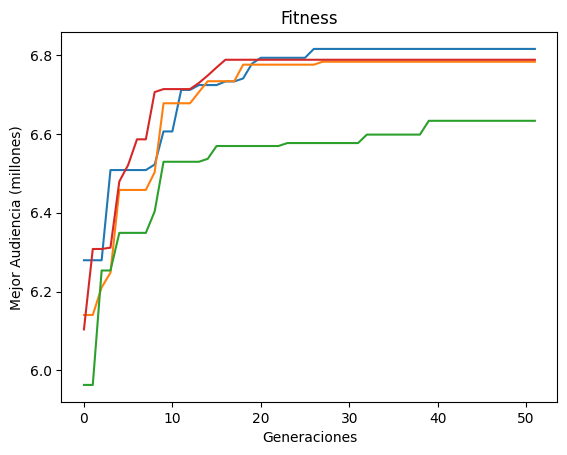

,categorias,base,fechas,ponderacion_fechas,bases_ponderadas,coincidencias,correccion_coincidencias
id_partido,,,,,,,
P1,BA,1.30,D16,0.75,0.9750,0,0.9750
P2,BA,1.30,D20,1.00,1.3000,0,1.3000
P3,CC,0.47,V20,0.40,0.1880,0,0.1880
P4,BA,1.30,S20,1.00,1.3000,0,1.3000
P5,CC,0.47,L20,0.40,0.1880,0,0.1880
P6,BC,0.75,S12,0.55,0.4125,0,0.4125
P7,BB,0.90,S18,0.80,0.7200,0,0.7200
P8,BB,0.90,D18,0.85,0.7650,0,0.7650
P9,BC,0.75,D12,0.45,0.3375,0,0.3375



 Mejor Audiencia = 6.816 millones


In [ ]:


mejor_solucion, mejor_audiencia = None, 0
for i in range(4):
  #print(f'Ejecucion nº {i} del Algoritmo Genético')
  solucion, audiencia, record_fitness = algoritmo_genetico(N=100,mutacion=.4,elitismo=.2,generaciones=50)
  if mejor_audiencia < audiencia:
    mejor_solucion, mejor_audiencia = solucion, audiencia
  plt.plot(record_fitness)
plt.title('Fitness')
plt.xlabel("Generaciones")
plt.ylabel("Mejor Audiencia (millones)")
plt.show()

jornada, audiencia = crear_dataframe_solucion(partidos,mejor_solucion)
display(jornada)
print(f"\n Mejor Audiencia = {round(audiencia,3)} millones")

## Conclusiones

La mejor sulucion encontrada coresponde a las fechas **('D20', 'D18', 'L20', 'S20', 'V20', 'S12', 'S16', 'S18', 'D12', 'D16')** con una audiencia de **6.856 millones**. Se observa que la influencia de la correción por coinciencia entre partidos tiene una gran influencia sobre el resultado final.<br>
Se ha podido comprobar que con una población incial de 100 individuos con un elitismo superior al 0.2 el algoritmo converge antes de las 50 generaciones alcanzando en las mayoria de la ejecuciones los mayores valores de audiencia obtinidos tanto con este método como con los métodos de busqueda aleatoria,local y recocido simulado.<br>
A pesar de que los otros métodos obtienen valores altos de audiencia, convergen con frecuencia en máximos locales inferiores a la mejor solución encontrada, mientras que el algoritmo genético llega a ella de forma regular. Como se desconoce si está solución se trata de un máximo global sería conveniente explorar otros medios de selección menos agresivos que la ruleta, que favorece la rápida convergencia del algoritmo, o implementar métodos alternativos de mutación y cruce, que favorezcan una exploración más amplia del espacio de soluciones.